# One place to print all of the results from batch_cifar_tests.py

## Imports

We start by importing seaborn such that we can inline the figures

In [1]:
# Some imports
import random
import matplotlib.pyplot as plt
import seaborn as sns
from __future__ import print_function
import time
import pickle
import numpy as np
from scipy.signal import lfilter

# This is a bit of magic to make matplotlib figures appear inline in the notebook
# rather than in a new window.
%matplotlib inline
plt.rcParams['figure.figsize'] = (10.0, 8.0) # set default size of plots
plt.rcParams['image.interpolation'] = 'nearest'
plt.rcParams['image.cmap'] = 'gray'

# Seaborn config
sns.set(color_codes=True)

# Some more magic so that the notebook will reload external python modules;
# see http://stackoverflow.com/questions/1907993/autoreload-of-modules-in-ipython
%load_ext autoreload
%autoreload 2

## Unpickle the data

Put all unpickling here

In [2]:
def load(dic_name):
    with open("./results/%s.dat" % dic_name, "rb") as f:
        return pickle.load(f)

In [35]:
# our init, vs, he init data
init_check_test = load("init_check_test")
our_init_results = init_check_test["our_init"]
our_init_results_val = init_check_test["our_init_val"]
our_init_time_updates = init_check_test["our_init_time_updates"]
our_init_time_flops = init_check_test["our_init_time_flops"]
our_init_label = init_check_test["our_init_label"]
he_init_results = init_check_test["he_init"]
he_init_results_val = init_check_test["he_init_val"]
he_init_time_updates = init_check_test["he_init_time_updates"]
he_init_time_flops = init_check_test["he_init_time_flops"]
he_init_label = init_check_test["he_init_label"]


# init_check_test["baseline_flops"] = [i*10*baseline_flops for i in range(501)]
# with open("./results/init_check_test.dat", "wb") as f:
#         pickle.dump(init_check_test, f)

In [4]:
# our init for padding vs he init for padding vs xavier init for padding
padding_test = load("padding_init_test")
our_pad_results = padding_test["our_init"]
our_pad_results_val = padding_test["our_init_val"]
our_pad_time_updates = padding_test["our_init_time_updates"]
our_pad_time_flops = padding_test["our_init_time_flops"]
our_pad_label = padding_test["our_init_label"]
he_pad_results = padding_test["he_init"]
he_pad_results_val = padding_test["he_init_val"]
he_pad_time_updates = padding_test["he_init_time_updates"]
he_pad_time_flops = padding_test["he_init_time_flops"]
he_pad_label = padding_test["he_init_label"]
x_pad_results = padding_test["x_init"]
x_pad_results_val = padding_test["x_init_val"]
x_pad_time_updates = padding_test["x_init_time_updates"]
x_pad_time_flops = padding_test["x_init_time_flops"]
x_pad_label = padding_test["x_init_label"]

In [33]:
# adaptive lr vs stationary lr    
init_check_test = load("lr_check_test")
lr_change_results = init_check_test["lr_change"]
lr_change_results_val = init_check_test["lr_change_val"]
lr_change_time_updates = init_check_test["lr_change_time_updates"]
lr_change_time_flops = init_check_test["lr_change_time_flops"]
lr_change_label = init_check_test["lr_change_label"]
no_lr_change_results = init_check_test["no_lr_change"]
no_lr_change_results_val = init_check_test["no_lr_change_val"]
no_lr_change_time_updates = init_check_test["no_lr_change_time_updates"]
no_lr_change_time_flops = init_check_test["no_lr_change_time_flops"]
no_lr_change_label = init_check_test["no_lr_change_label"]

In [6]:
# Symmetry breaking tests
init_check_test = load("sym_test")
sym_results = init_check_test["sym"]
sym_results_val = init_check_test["sym_val"]
sym_time_updates = init_check_test["sym_time_updates"]
sym_time_flops = init_check_test["sym_time_flops"]
sym_label = init_check_test["sym_label"]
no_sym_results = init_check_test["no_sym"]
no_sym_results_val = init_check_test["no_sym_val"]
no_sym_time_updates = init_check_test["no_sym_time_updates"]
no_sym_time_flops = init_check_test["no_sym_time_flops"]
no_sym_label = init_check_test["no_sym_label"]

In [36]:
# R2WiderR test
widen_test = load("widen_test")
widen_results = widen_test["widen_results"]
widen_results_val = widen_test["widen_results_val"]
widen_time_updates = widen_test["widen_time_updates"]
widen_time_flops = widen_test["widen_time_flops"]
widen_labels = widen_test["widen_labels"]

In [8]:
# R2WiderR convergence test
widen_test = load("widen_convergence_test")
widen_c_results = widen_test["widen_results"]
widen_c_results_val = widen_test["widen_results_val"]
widen_c_time_updates = widen_test["widen_time_updates"]
widen_c_time_flops = widen_test["widen_time_flops"]
widen_c_labels = widen_test["widen_labels"]

In [39]:
# R2DeeperR test
deepen_test = load("deepen_test")
deepen_results = deepen_test["deepen_results"]
deepen_results_val = deepen_test["deepen_results_val"]
deepen_time_updates = deepen_test["deepen_time_updates"]
deepen_time_flops = deepen_test["deepen_time_flops"]
deepen_labels = deepen_test["deepen_labels"]

In [41]:
# R2DeeperR convergence test
deepen_c_test = load("deepen_convergence_test")
deepen_c_results = deepen_c_test["deepen_results"]
deepen_c_results_val = deepen_c_test["deepen_results_val"]
deepen_c_time_updates = deepen_c_test["deepen_time_updates"]
deepen_c_time_flops = deepen_c_test["deepen_time_flops"]
deepen_c_labels = deepen_c_test["deepen_labels"]

In [11]:
# Grid search test
grid_test = load("grid_search_test")
grid_results = grid_test["results"]
grid_results_val = grid_test["results_val"]
grid_time_updates = grid_test["result_time_updates"]
grid_time_flops = grid_test["result_time_flops"]
grid_labels = grid_test["grid_labels"]

In [12]:
# R2WiderR tests, copying Net2WiderNet
save_dict = load("r2widerr_test")
wid_teacher_results = save_dict['teacher_results']
wid_teacher_results_val = save_dict['teacher_results_val']
wid_teacher_time_updates = save_dict['teacher_time_updates']
wid_teacher_label = "Teacher Network."

wid_our_pad_results = save_dict['our_pad_results']
wid_our_pad_results_val = save_dict['our_pad_results_val']
wid_our_pad_time_updates = save_dict['our_pad_time_updates']
wid_our_pad_label = save_dict['our_pad_label']

wid_rand_pad_results = save_dict['rand_pad_results']
wid_rand_pad_results_val = save_dict['rand_pad_results_val']
wid_rand_pad_time_updates = save_dict['rand_pad_time_updates']
wid_rand_pad_label = save_dict['rand_pad_label']

wid_no_trans_results = save_dict['no_trans_results']
wid_no_trans_results_val = save_dict['no_trans_results_val']
wid_no_trans_time_updates = save_dict['no_trans_time_updates']
wid_no_trans_label = save_dict['no_trans_label']

In [164]:
# R2DeeperR tests, copying Net2DeeperNet
save_dict = load("r2deeperr_test")
deep_teacher_results = save_dict['teacher_results']
deep_teacher_results_val = save_dict['teacher_results_val']
deep_teacher_time_updates = save_dict['teacher_time_updates']
deep_teacher_label = "Teacher Network."

deep_our_pad_results = save_dict['our_pad_results']
deep_our_pad_results_val = save_dict['our_pad_results_val']
deep_our_pad_time_updates = save_dict['our_pad_time_updates']
deep_our_pad_label = save_dict['our_pad_label']

deep_rand_pad_results = save_dict['rand_pad_results']
deep_rand_pad_results_val = save_dict['rand_pad_results_val']
deep_rand_pad_time_updates = save_dict['rand_pad_time_updates']
deep_rand_pad_label = save_dict['rand_pad_label']

deep_no_trans_results = save_dict['no_trans_results']
deep_no_trans_results_val = save_dict['no_trans_results_val']
deep_no_trans_time_updates = save_dict['no_trans_time_updates']
deep_no_trans_label = save_dict['no_trans_label']

## Printing graphs

Define the exponential moving average (ema) functions, to plot smother graphs that illustrate the learning with less noise

All later cells should actually print out graphs

In [14]:
def ema(l, e=0.95, N=20):
#     l = [l[0]]*(N-1) + l
#     weights = np.array([e ** i for i in range(N)]) * (1-e) / (1-e**N)
#     ema = np.convolve(l, weights, mode='valid')n = 15  
    pad = [l[0]]*(N-1) + l
    return lfilter([1.0/N]*N, 1, pad)[N-1:]

def ema_dl(double_list, e=0.9):
    dl = []
    for l in double_list:
        dl.append(ema(l, e))
    return dl

### Our init vs He init tests

/anaconda/envs/cs231n/lib/python3.6/site-packages/seaborn/timeseries.py:183: UserWarning: The tsplot function is deprecated and will be removed or replaced (in a substantially altered version) in a future release.
  warnings.warn(msg, UserWarning)


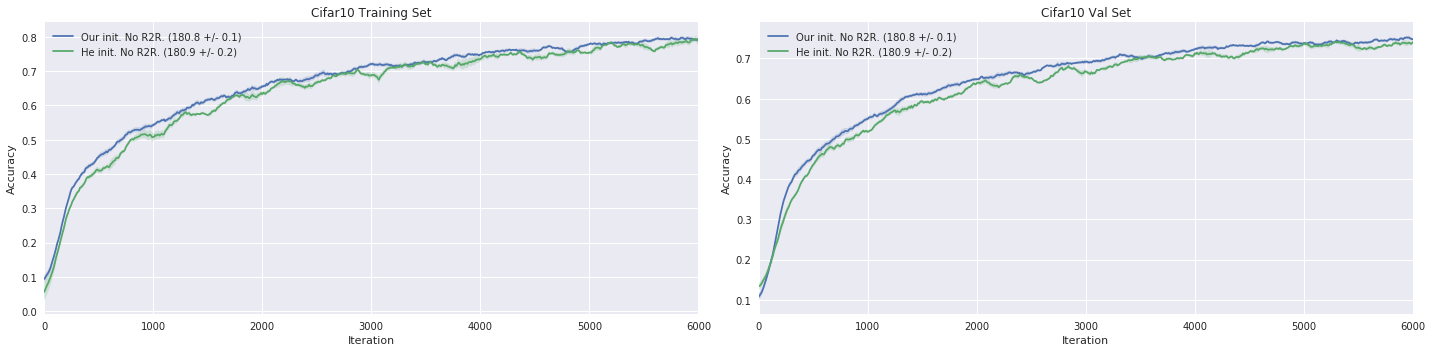

In [37]:
# Plot the results of the above tests with confidence intervals
plt.figure(figsize=(20,5))
plt.tight_layout()

our_init_ema = ema_dl(our_init_results, e=0.95)
he_init_ema = ema_dl(he_init_results, e=0.95)
our_init_ema_val = ema_dl(our_init_results_val, e=0.95)
he_init_ema_val = ema_dl(he_init_results_val, e=0.95)

plt.subplot(121)
plt.xlabel('Iteration')
plt.ylabel('Accuracy')
plt.title('Cifar10 Training Set')
sns.tsplot(data=our_init_ema, time=our_init_time_updates, condition=our_init_label)
sns.tsplot(data=he_init_ema, time=he_init_time_updates, color="g", condition=he_init_label)
plt.legend()

plt.subplot(122)
plt.xlabel('Iteration')
plt.ylabel('Accuracy')
plt.title('Cifar10 Val Set')
sns.tsplot(data=our_init_ema_val, time=our_init_time_updates, condition=our_init_label)
sns.tsplot(data=he_init_ema_val, time=he_init_time_updates, color="g", condition=he_init_label)
plt.legend()

plt.tight_layout()

### Our padding vs padding with He vs padding with Xavier

/anaconda/envs/cs231n/lib/python3.6/site-packages/seaborn/timeseries.py:183: UserWarning: The tsplot function is deprecated and will be removed or replaced (in a substantially altered version) in a future release.
  warnings.warn(msg, UserWarning)


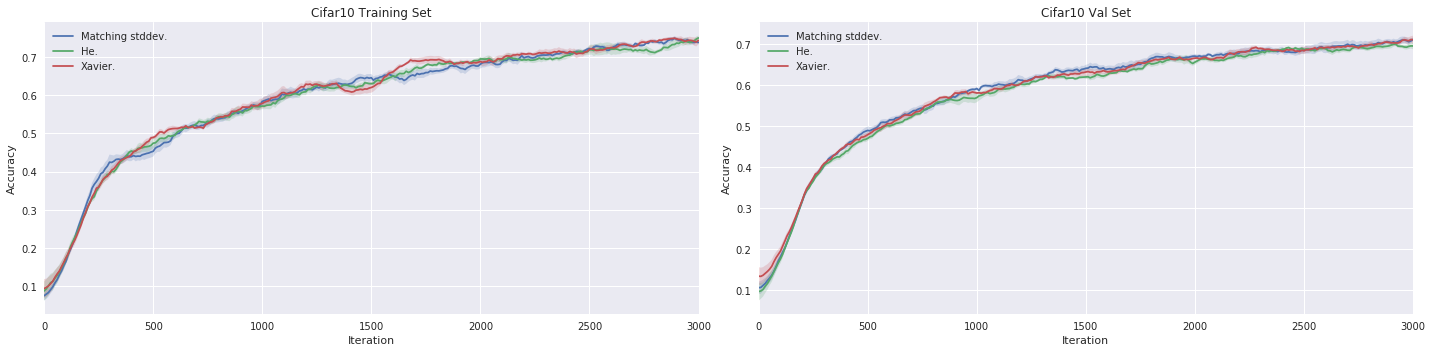

In [16]:
plt.figure(figsize=(20,5))
plt.tight_layout()

our_pad_ema = ema_dl(our_pad_results, e=0.95)
he_pad_ema = ema_dl(he_pad_results, e=0.95)
x_pad_ema = ema_dl(x_pad_results, e=0.95)
our_pad_ema_val = ema_dl(our_pad_results_val, e=0.95)
he_pad_ema_val = ema_dl(he_pad_results_val, e=0.95)
x_pad_ema_val = ema_dl(x_pad_results_val, e=0.95)

cp = sns.color_palette("deep", 10)

plt.subplot(121)
plt.xlabel('Iteration')
plt.ylabel('Accuracy')
plt.title('Cifar10 Training Set')
sns.tsplot(data=our_pad_ema, time=our_pad_time_updates, color=cp[0], condition=our_pad_label)
sns.tsplot(data=he_pad_ema, time=he_pad_time_updates, color=cp[1], condition=he_pad_label)
sns.tsplot(data=x_pad_ema, time=x_pad_time_updates, color=cp[2], condition=x_pad_label)
plt.legend()

plt.subplot(122)
plt.xlabel('Iteration')
plt.ylabel('Accuracy')
plt.title('Cifar10 Val Set')
sns.tsplot(data=our_pad_ema_val, time=our_pad_time_updates, color=cp[0], condition=our_pad_label)
sns.tsplot(data=he_pad_ema_val, time=he_pad_time_updates, color=cp[1], condition=he_pad_label)
sns.tsplot(data=x_pad_ema_val, time=x_pad_time_updates, color=cp[2], condition=x_pad_label)
plt.legend()

plt.tight_layout()

### Adaptive lr vs stationary lr

/anaconda/envs/cs231n/lib/python3.6/site-packages/seaborn/timeseries.py:183: UserWarning: The tsplot function is deprecated and will be removed or replaced (in a substantially altered version) in a future release.
  warnings.warn(msg, UserWarning)


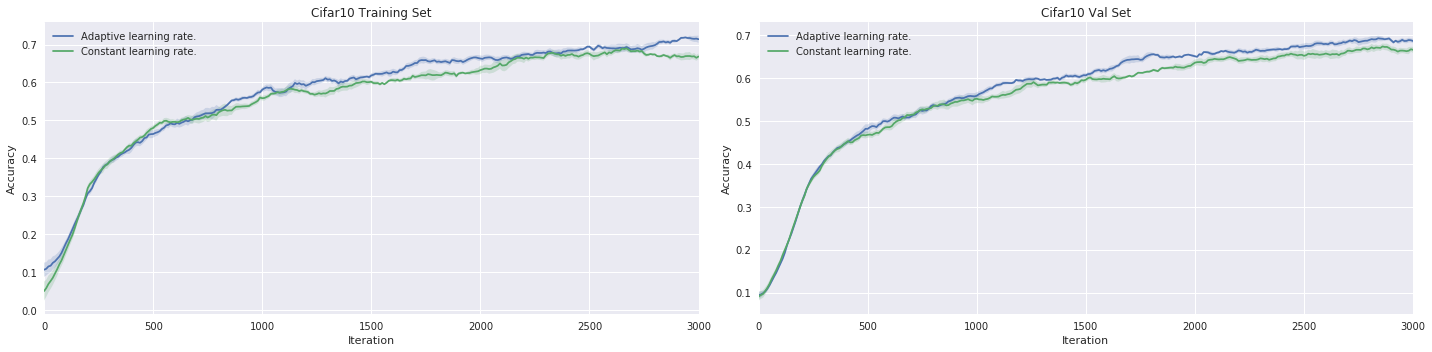

In [34]:
plt.figure(figsize=(20,5))
plt.tight_layout()

lr_change_ema = ema_dl(lr_change_results, e=0.85)
no_lr_change_ema = ema_dl(no_lr_change_results, e=0.85)
lr_change_ema_val = ema_dl(lr_change_results_val, e=0.85)
no_lr_change_ema_val = ema_dl(no_lr_change_results_val, e=0.85)

plt.subplot(121)
plt.xlabel('Iteration')
plt.ylabel('Accuracy')
plt.title('Cifar10 Training Set')
sns.tsplot(data=lr_change_ema, time=lr_change_time_updates, condition=lr_change_label)
sns.tsplot(data=no_lr_change_ema, time=no_lr_change_time_updates, color="g", condition=no_lr_change_label)
plt.legend()

plt.subplot(122)
plt.xlabel('Iteration')
plt.ylabel('Accuracy')
plt.title('Cifar10 Val Set')
sns.tsplot(data=lr_change_ema_val, time=lr_change_time_updates, condition=lr_change_label)
sns.tsplot(data=no_lr_change_ema_val, time=no_lr_change_time_updates, color="g", condition=no_lr_change_label)
plt.legend()

plt.tight_layout()

### Symmetry breaking tests

/anaconda/envs/cs231n/lib/python3.6/site-packages/seaborn/timeseries.py:183: UserWarning: The tsplot function is deprecated and will be removed or replaced (in a substantially altered version) in a future release.
  warnings.warn(msg, UserWarning)


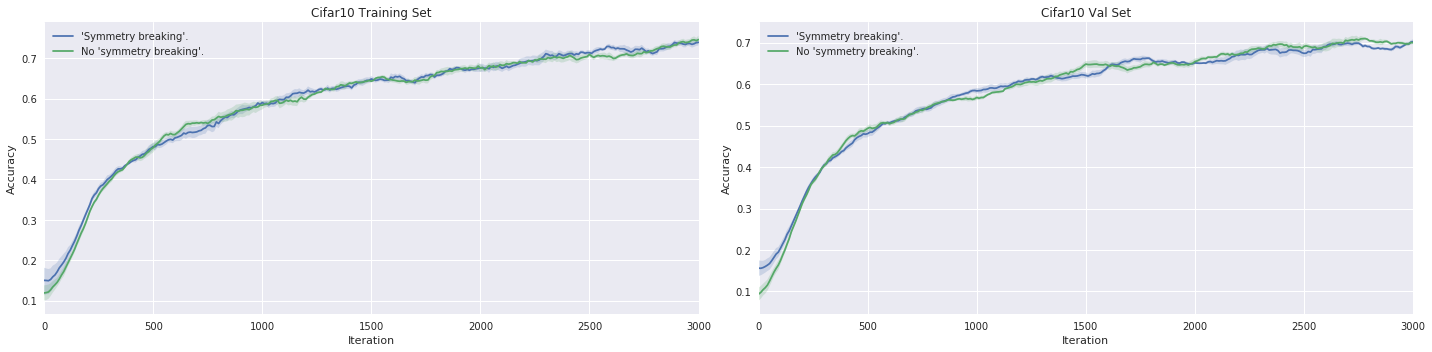

In [18]:
plt.figure(figsize=(20,5))
plt.tight_layout()

sym_ema = ema_dl(sym_results, e=0.85)
no_sym_ema = ema_dl(no_sym_results, e=0.85)
sym_ema_val = ema_dl(sym_results_val, e=0.85)
no_sym_ema_val = ema_dl(no_sym_results_val, e=0.85)

plt.subplot(121)
plt.xlabel('Iteration')
plt.ylabel('Accuracy')
plt.title('Cifar10 Training Set')
sns.tsplot(data=sym_ema, time=sym_time_updates, condition=sym_label)
sns.tsplot(data=no_sym_ema, time=no_sym_time_updates, color="g", condition=no_sym_label)
plt.legend()

plt.subplot(122)
plt.xlabel('Iteration')
plt.ylabel('Accuracy')
plt.title('Cifar10 Val Set')
sns.tsplot(data=sym_ema_val, time=sym_time_updates, condition=sym_label)
sns.tsplot(data=no_sym_ema_val, time=no_sym_time_updates, color="g", condition=no_sym_label)
plt.legend()

plt.tight_layout()

### R2WiderR tests

/anaconda/envs/cs231n/lib/python3.6/site-packages/seaborn/timeseries.py:183: UserWarning: The tsplot function is deprecated and will be removed or replaced (in a substantially altered version) in a future release.
  warnings.warn(msg, UserWarning)


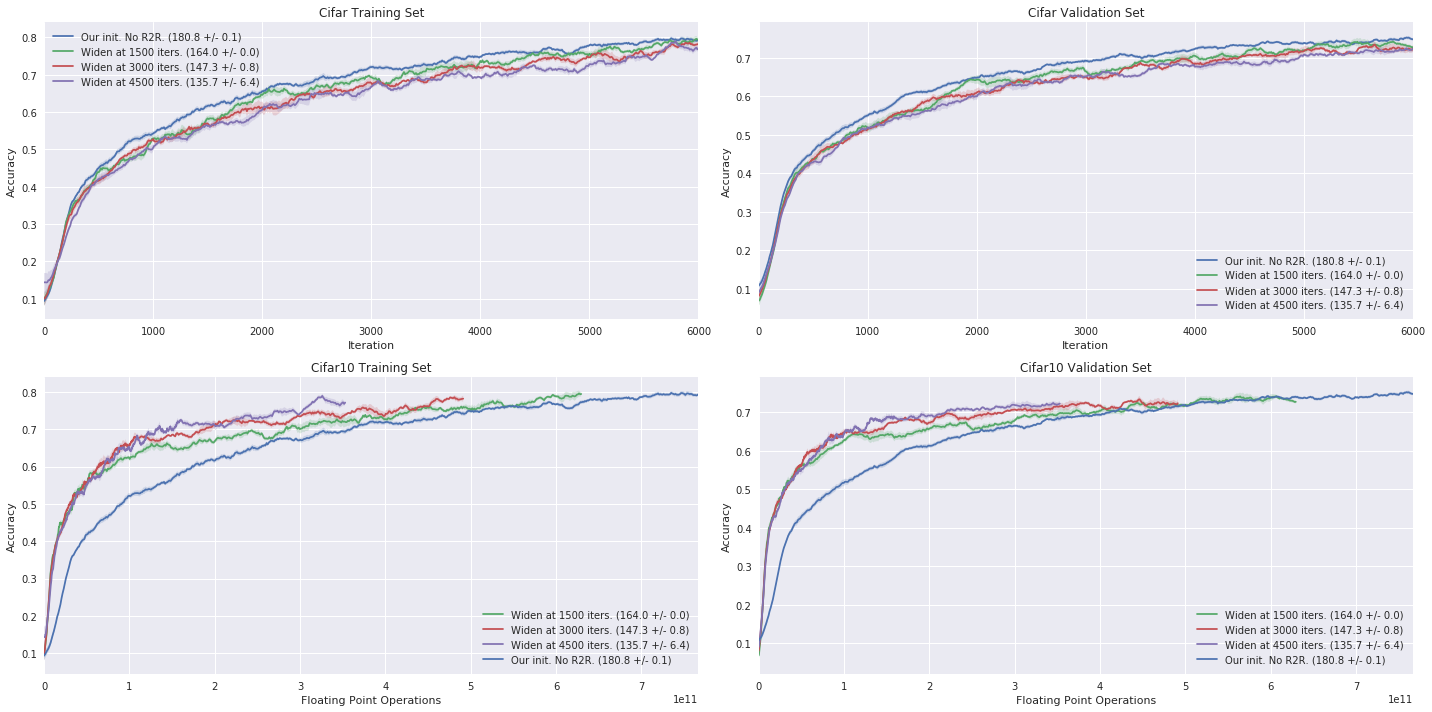

In [38]:
# Plot results
plt.figure(figsize=(20,10))

old_results_ema = ema_dl(our_init_results)
old_results_ema_val = ema_dl(our_init_results_val)
widen_ema = {}
for key in widen_results:
    widen_ema[key] = ema_dl(widen_results[key])
widen_ema_val = {}
for key in widen_results_val:
    widen_ema_val[key] = ema_dl(widen_results_val[key])

    
# Plot results
plt.subplot(2,2,1)
plt.xlabel('Iteration')
plt.ylabel('Accuracy')
plt.title('Cifar Training Set')
cp = sns.color_palette("deep", 10)
sns.tsplot(data=old_results_ema, time=our_init_time_updates, color=cp[0], condition=our_init_label)
i = 1
for key in widen_results:
    sns.tsplot(data=widen_ema[key], time=widen_time_updates[key], color=cp[i], condition=widen_labels[key])
    i += 1
plt.legend()

plt.subplot(2,2,2)
plt.xlabel('Iteration')
plt.ylabel('Accuracy')
plt.title('Cifar Validation Set')
sns.tsplot(data=old_results_ema_val, time=our_init_time_updates, color=cp[0], condition=our_init_label)
i = 1
for key in widen_results:
    sns.tsplot(data=widen_ema_val[key], time=widen_time_updates[key], color=cp[i], condition=widen_labels[key])
    i += 1
plt.legend()


plt.subplot(2,2,3)
plt.xlabel('Floating Point Operations')
plt.ylabel('Accuracy')
plt.title('Cifar10 Training Set')
cp = sns.color_palette("deep", 10)
i = 1
for key in widen_results:
    sns.tsplot(data=widen_ema[key], time=widen_time_flops[key], color=cp[i], condition=widen_labels[key])
    i += 1
sns.tsplot(data=old_results_ema, time=our_init_time_flops, color=cp[0], condition=our_init_label)
plt.legend()

plt.subplot(2,2,4)
plt.xlabel('Floating Point Operations')
plt.ylabel('Accuracy')
plt.title('Cifar10 Validation Set')
i = 1
for key in widen_results:
    sns.tsplot(data=widen_ema_val[key], time=widen_time_flops[key], color=cp[i], condition=widen_labels[key])
    i += 1
sns.tsplot(data=old_results_ema_val, time=our_init_time_flops, color=cp[0], condition=our_init_label)
plt.legend()

# shape
plt.tight_layout()

/anaconda/envs/cs231n/lib/python3.6/site-packages/seaborn/timeseries.py:183: UserWarning: The tsplot function is deprecated and will be removed or replaced (in a substantially altered version) in a future release.
  warnings.warn(msg, UserWarning)


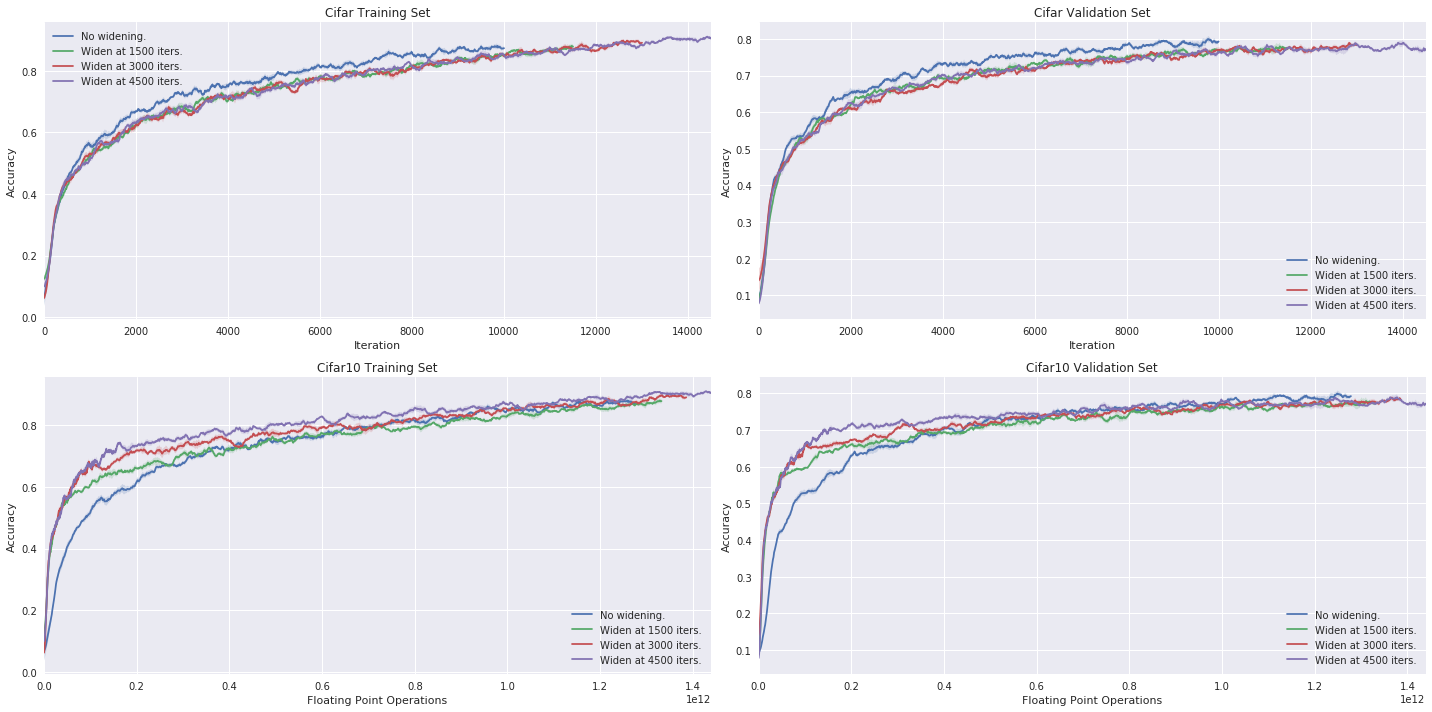

In [20]:
# Plot results
plt.figure(figsize=(20,10))

old_results_ema = ema_dl(our_init_results)
old_results_ema_val = ema_dl(our_init_results_val)
widen_c_ema = {}
for key in widen_c_results:
    widen_c_ema[key] = ema_dl(widen_c_results[key])
widen_c_ema_val = {}
for key in widen_c_results_val:
    widen_c_ema_val[key] = ema_dl(widen_c_results_val[key])

    
# Plot results
plt.subplot(2,2,1)
plt.xlabel('Iteration')
plt.ylabel('Accuracy')
plt.title('Cifar Training Set')
cp = sns.color_palette("deep", 10)
i = 0
for key in widen_c_results:
    sns.tsplot(data=widen_c_ema[key], time=widen_c_time_updates[key], color=cp[i], condition=widen_c_labels[key])
    i += 1
plt.legend()

plt.subplot(2,2,2)
plt.xlabel('Iteration')
plt.ylabel('Accuracy')
plt.title('Cifar Validation Set')
i = 0
for key in widen_c_results:
    sns.tsplot(data=widen_c_ema_val[key], time=widen_c_time_updates[key], color=cp[i], condition=widen_c_labels[key])
    i += 1
plt.legend()


plt.subplot(2,2,3)
plt.xlabel('Floating Point Operations')
plt.ylabel('Accuracy')
plt.title('Cifar10 Training Set')
cp = sns.color_palette("deep", 10)
i = 0
for key in widen_c_results:
    sns.tsplot(data=widen_c_ema[key], time=widen_c_time_flops[key], color=cp[i], condition=widen_c_labels[key])
    i += 1
plt.legend()

plt.subplot(2,2,4)
plt.xlabel('Floating Point Operations')
plt.ylabel('Accuracy')
plt.title('Cifar10 Validation Set')
i = 0
for key in widen_c_results:
    sns.tsplot(data=widen_c_ema_val[key], time=widen_c_time_flops[key], color=cp[i], condition=widen_c_labels[key])
    i += 1
plt.legend()

# shape
plt.tight_layout()

### R2DeeperR tests

/anaconda/envs/cs231n/lib/python3.6/site-packages/seaborn/timeseries.py:183: UserWarning: The tsplot function is deprecated and will be removed or replaced (in a substantially altered version) in a future release.
  warnings.warn(msg, UserWarning)


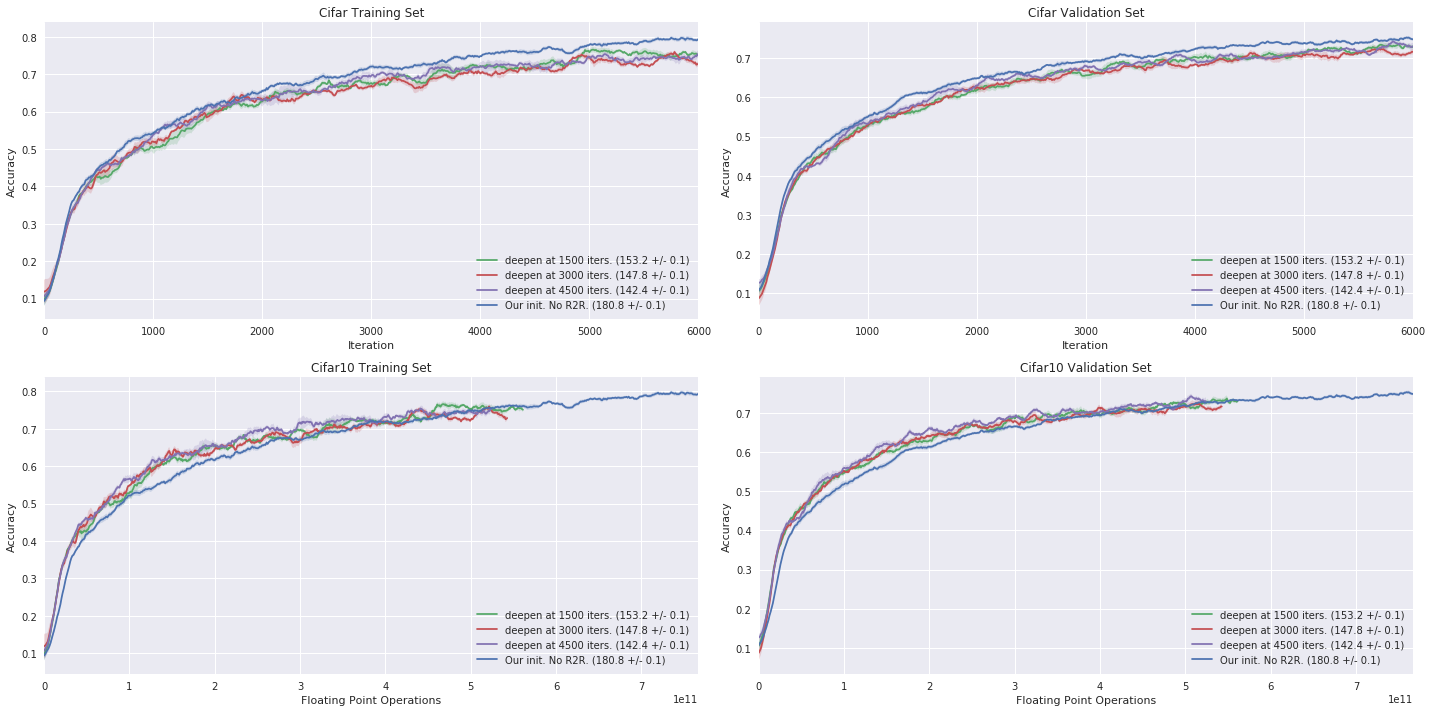

In [40]:
# Plot results
plt.figure(figsize=(20,10))

old_results_ema = ema_dl(our_init_results)
old_results_ema_val = ema_dl(our_init_results_val)
deepen_ema = {}
for key in deepen_results:
    deepen_ema[key] = ema_dl(deepen_results[key])
deepen_ema_val = {}
for key in deepen_results_val:
    deepen_ema_val[key] = ema_dl(deepen_results_val[key])

    
# Plot results
plt.subplot(2,2,1)
plt.xlabel('Iteration')
plt.ylabel('Accuracy')
plt.title('Cifar Training Set')
cp = sns.color_palette("deep", 10)
i = 1
for key in deepen_results:
    sns.tsplot(data=deepen_ema[key], time=deepen_time_updates[key], color=cp[i], condition=deepen_labels[key])
    i += 1
sns.tsplot(data=old_results_ema, time=our_init_time_updates, color=cp[0], condition=our_init_label)
plt.legend()

plt.subplot(2,2,2)
plt.xlabel('Iteration')
plt.ylabel('Accuracy')
plt.title('Cifar Validation Set')
i = 1
for key in deepen_results:
    sns.tsplot(data=deepen_ema_val[key], time=deepen_time_updates[key], color=cp[i], condition=deepen_labels[key])
    i += 1
sns.tsplot(data=old_results_ema_val, time=our_init_time_updates, color=cp[0], condition=our_init_label)
plt.legend()


plt.subplot(2,2,3)
plt.xlabel('Floating Point Operations')
plt.ylabel('Accuracy')
plt.title('Cifar10 Training Set')
cp = sns.color_palette("deep", 10)
i = 1
for key in deepen_results:
    sns.tsplot(data=deepen_ema[key], time=deepen_time_flops[key], color=cp[i], condition=deepen_labels[key])
    i += 1
sns.tsplot(data=old_results_ema, time=our_init_time_flops, color=cp[0], condition=our_init_label)
plt.legend()

plt.subplot(2,2,4)
plt.xlabel('Floating Point Operations')
plt.ylabel('Accuracy')
plt.title('Cifar10 Validation Set')
i = 1
for key in deepen_results:
    sns.tsplot(data=deepen_ema_val[key], time=deepen_time_flops[key], color=cp[i], condition=deepen_labels[key])
    i += 1
sns.tsplot(data=old_results_ema_val, time=our_init_time_flops, color=cp[0], condition=our_init_label)
plt.legend()

# shape
plt.tight_layout()

/anaconda/envs/cs231n/lib/python3.6/site-packages/seaborn/timeseries.py:183: UserWarning: The tsplot function is deprecated and will be removed or replaced (in a substantially altered version) in a future release.
  warnings.warn(msg, UserWarning)


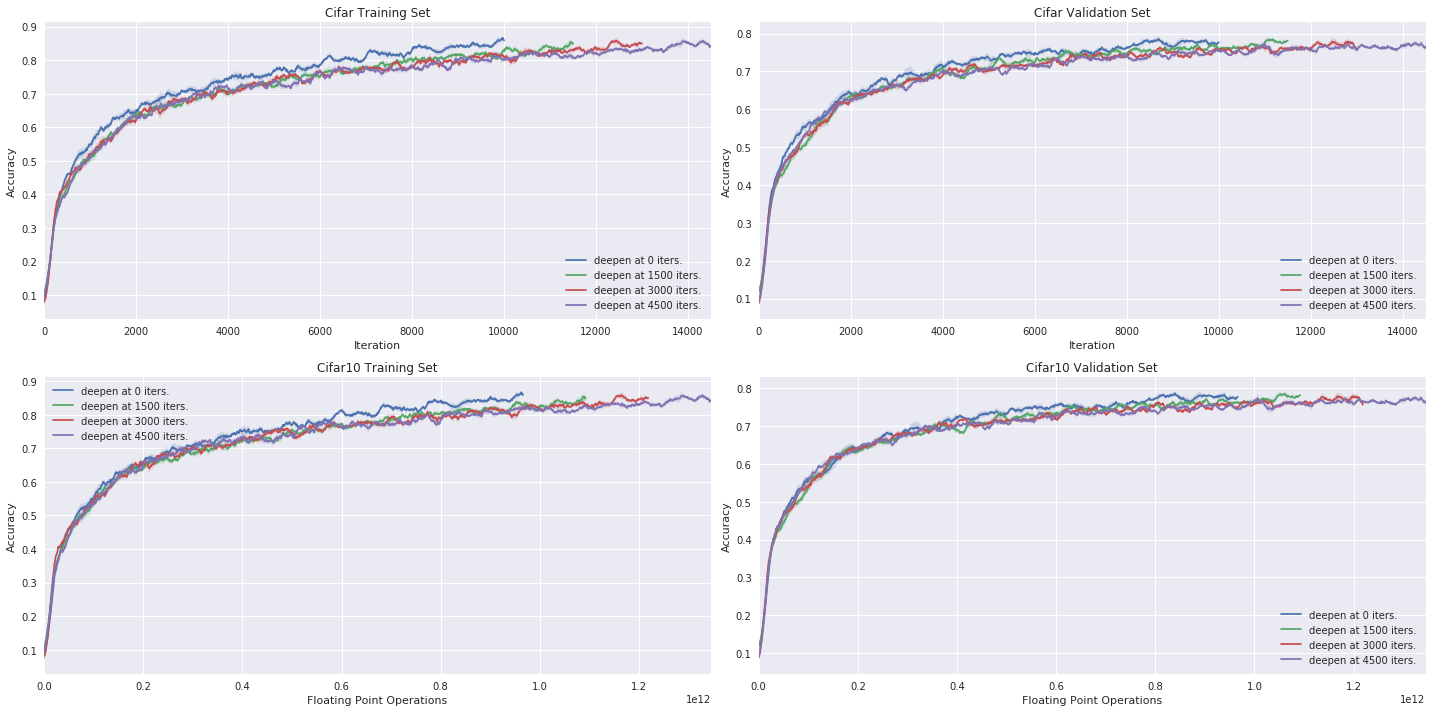

In [42]:
# Plot results
plt.figure(figsize=(20,10))

old_results_ema = ema_dl(our_init_results)
old_results_ema_val = ema_dl(our_init_results_val)
deepen_c_ema = {}
for key in deepen_c_results:
    deepen_c_ema[key] = ema_dl(deepen_c_results[key])
deepen_c_ema_val = {}
for key in deepen_c_results_val:
    deepen_c_ema_val[key] = ema_dl(deepen_c_results_val[key])

    
# Plot results
plt.subplot(2,2,1)
plt.xlabel('Iteration')
plt.ylabel('Accuracy')
plt.title('Cifar Training Set')
cp = sns.color_palette("deep", 10)
i = 0
for key in deepen_c_results:
    sns.tsplot(data=deepen_c_ema[key], time=deepen_c_time_updates[key], color=cp[i], condition=deepen_c_labels[key])
    i += 1
plt.legend()

plt.subplot(2,2,2)
plt.xlabel('Iteration')
plt.ylabel('Accuracy')
plt.title('Cifar Validation Set')
i = 0
for key in deepen_c_results:
    sns.tsplot(data=deepen_c_ema_val[key], time=deepen_c_time_updates[key], color=cp[i], condition=deepen_c_labels[key])
    i += 1
plt.legend()


plt.subplot(2,2,3)
plt.xlabel('Floating Point Operations')
plt.ylabel('Accuracy')
plt.title('Cifar10 Training Set')
cp = sns.color_palette("deep", 10)
i = 0
for key in deepen_c_results:
    sns.tsplot(data=deepen_c_ema[key], time=deepen_c_time_flops[key], color=cp[i], condition=deepen_c_labels[key])
    i += 1
plt.legend()

plt.subplot(2,2,4)
plt.xlabel('Floating Point Operations')
plt.ylabel('Accuracy')
plt.title('Cifar10 Validation Set')
i = 0
for key in deepen_c_results:
    sns.tsplot(data=deepen_c_ema_val[key], time=deepen_c_time_flops[key], color=cp[i], condition=deepen_c_labels[key])
    i += 1
plt.legend()

# shape
plt.tight_layout()

### Grid search tests

/anaconda/envs/cs231n/lib/python3.6/site-packages/seaborn/timeseries.py:183: UserWarning: The tsplot function is deprecated and will be removed or replaced (in a substantially altered version) in a future release.
  warnings.warn(msg, UserWarning)


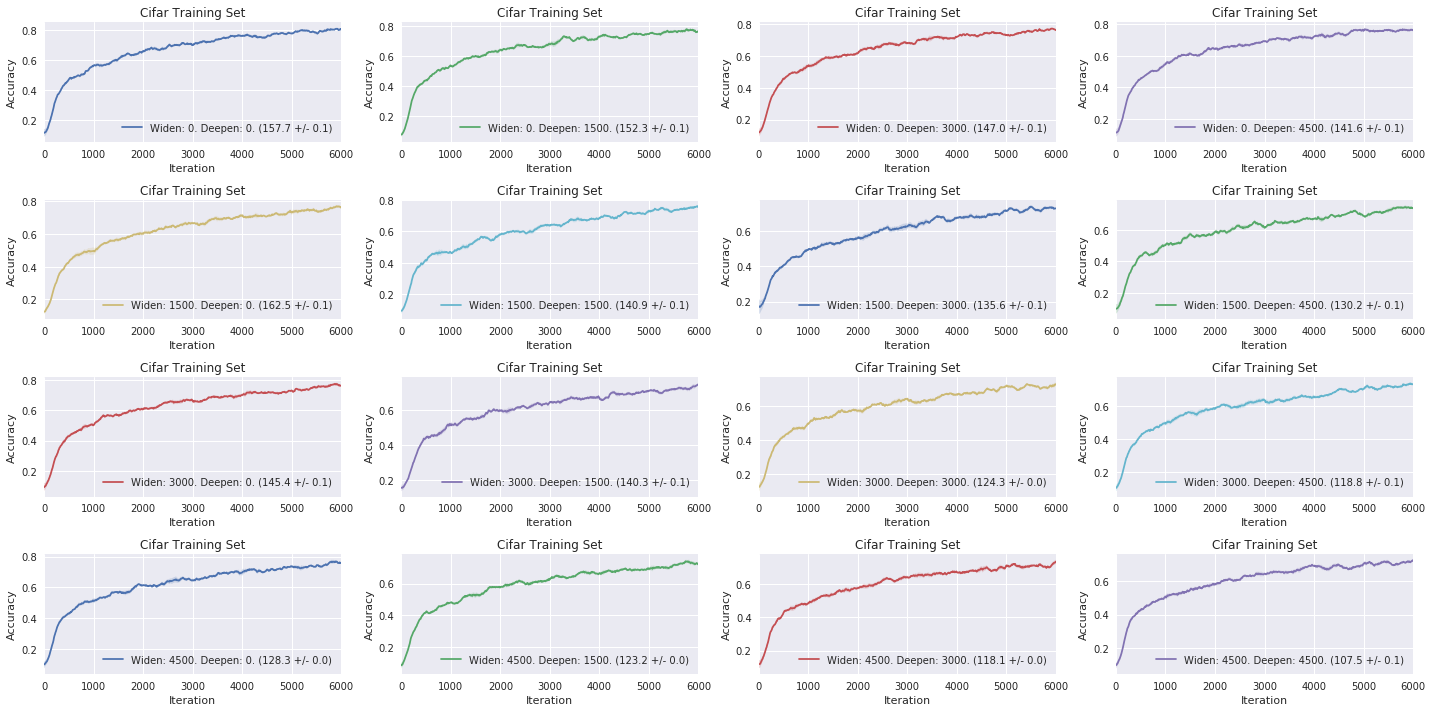

In [23]:
plt.figure(figsize=(20,10))
cp = sns.color_palette("deep", 16)

split_times = [0,1500,3000,4500]

i = 0
for widen in split_times:
    for deepen in split_times:
        plt.subplot(4,4,i+1)
        plt.xlabel('Iteration')
        plt.ylabel('Accuracy')
        plt.title('Cifar Training Set')
        grid_ema = ema_dl(grid_results[widen][deepen])
        sns.tsplot(data=grid_ema, time=grid_time_updates[widen][deepen], color=cp[i], condition=grid_labels[widen][deepen])
        i += 1

plt.legend()
plt.tight_layout()

/anaconda/envs/cs231n/lib/python3.6/site-packages/seaborn/timeseries.py:183: UserWarning: The tsplot function is deprecated and will be removed or replaced (in a substantially altered version) in a future release.
  warnings.warn(msg, UserWarning)


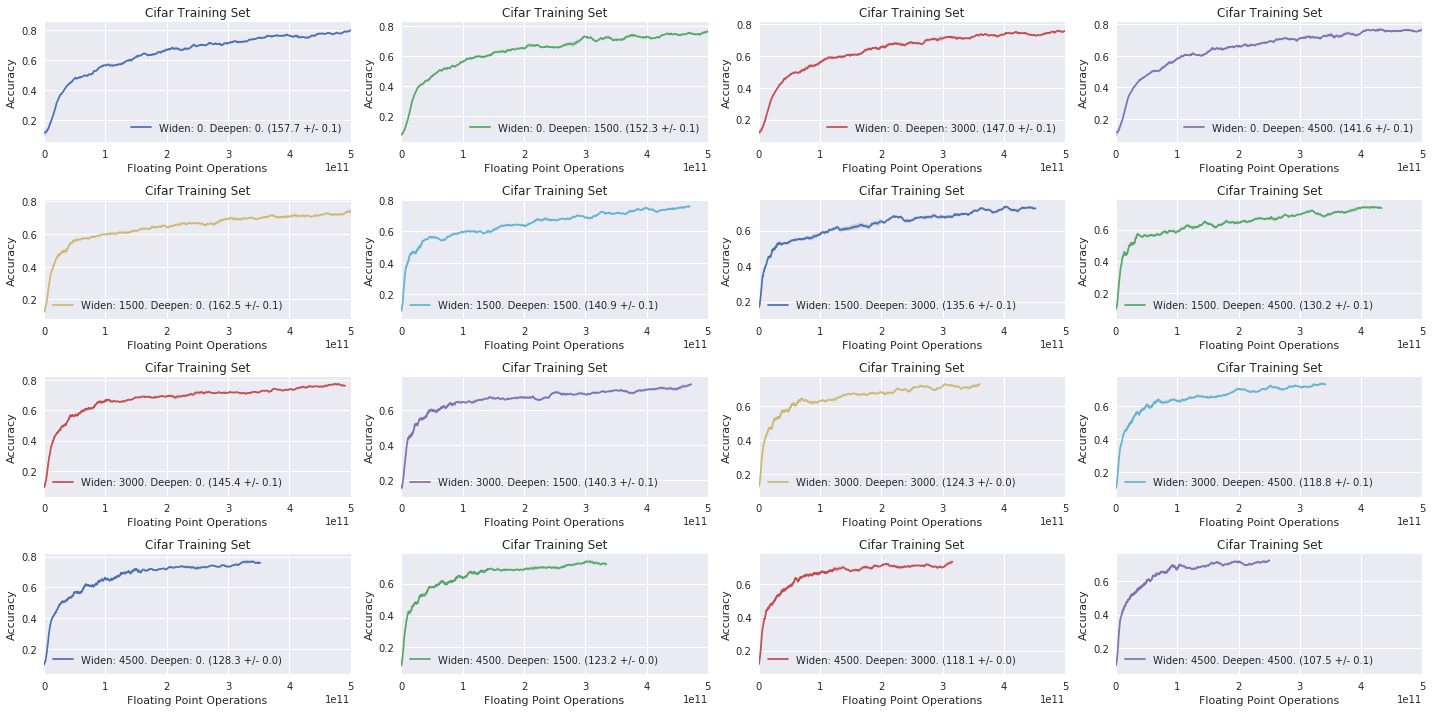

In [24]:
plt.figure(figsize=(20,10))
cp = sns.color_palette("deep", 16)

i = 0
for widen in split_times:
    for deepen in split_times:
        plt.subplot(4,4,i+1)
        plt.xlabel('Floating Point Operations')
        plt.ylabel('Accuracy')
        plt.title('Cifar Training Set')
        grid_ema = ema_dl(grid_results[widen][deepen])
        g = sns.tsplot(data=grid_ema, time=grid_time_flops[widen][deepen], color=cp[i], condition=grid_labels[widen][deepen])
        g.axes.set_xlim(0,5e11)
        i += 1

plt.legend()
plt.tight_layout()

/anaconda/envs/cs231n/lib/python3.6/site-packages/seaborn/timeseries.py:183: UserWarning: The tsplot function is deprecated and will be removed or replaced (in a substantially altered version) in a future release.
  warnings.warn(msg, UserWarning)


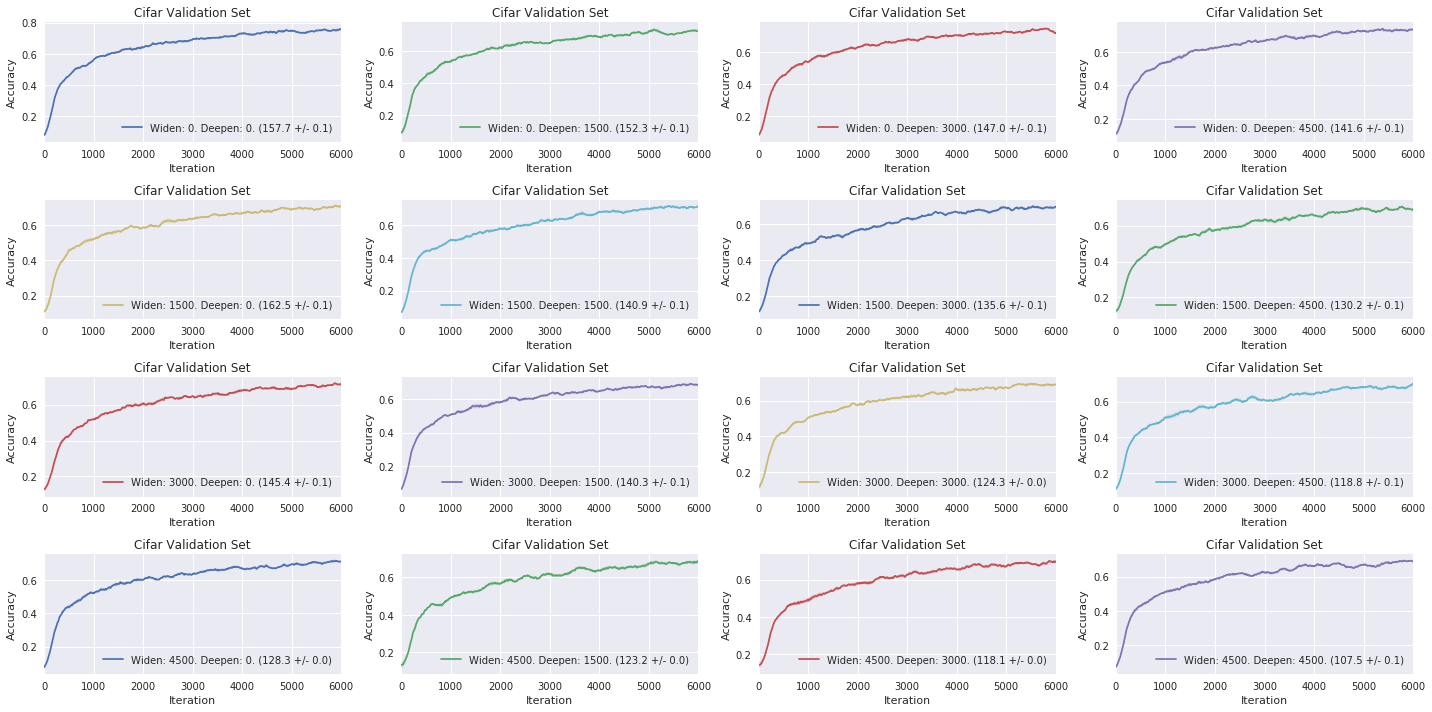

In [25]:
plt.figure(figsize=(20,10))
cp = sns.color_palette("deep", 16)


i = 0
for widen in split_times:
    for deepen in split_times:
        plt.subplot(4,4,i+1)
        plt.xlabel('Iteration')
        plt.ylabel('Accuracy')
        plt.title('Cifar Validation Set')
        grid_ema_val = ema_dl(grid_results_val[widen][deepen])
        sns.tsplot(data=grid_ema_val, time=grid_time_updates[widen][deepen], color=cp[i], condition=grid_labels[widen][deepen])
        i += 1


plt.legend()
plt.tight_layout()

/anaconda/envs/cs231n/lib/python3.6/site-packages/seaborn/timeseries.py:183: UserWarning: The tsplot function is deprecated and will be removed or replaced (in a substantially altered version) in a future release.
  warnings.warn(msg, UserWarning)


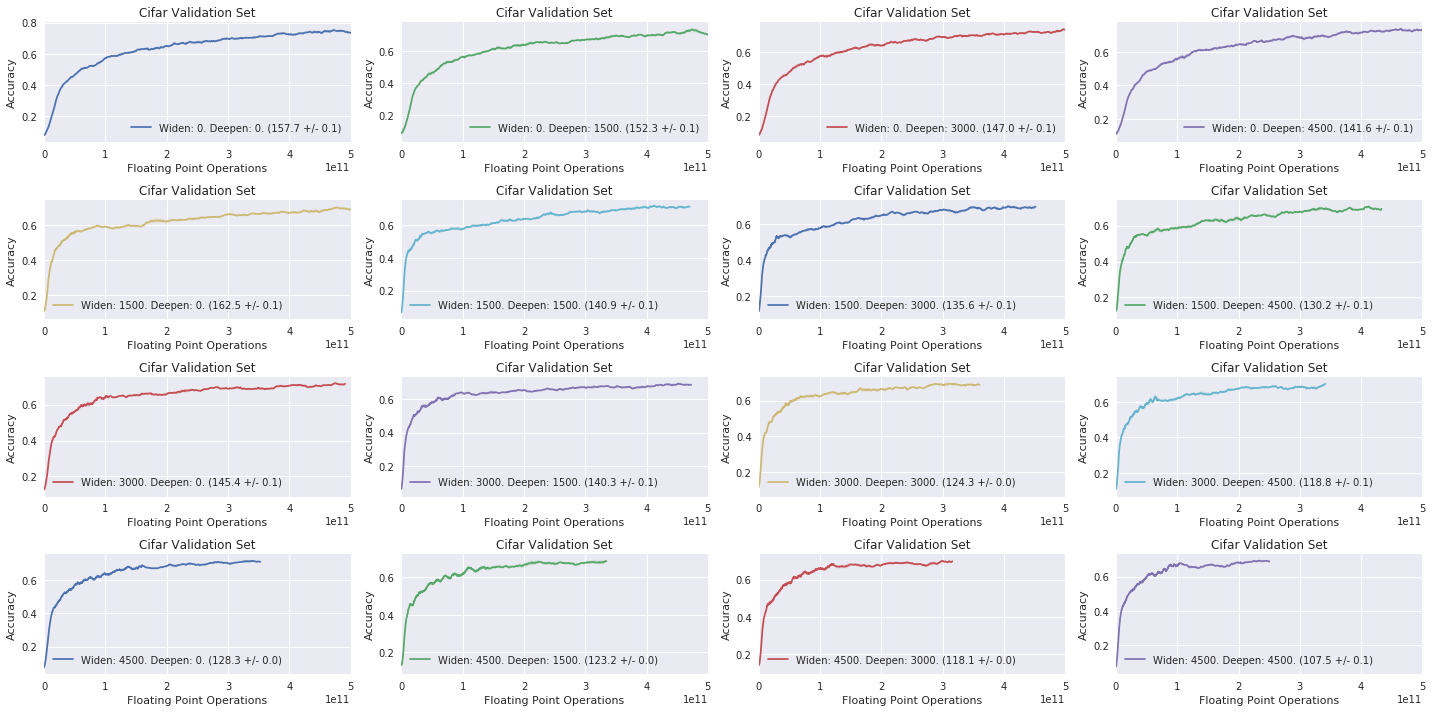

In [26]:
plt.figure(figsize=(20,10))
cp = sns.color_palette("deep", 16)


i = 0
for widen in split_times:
    for deepen in split_times:
        plt.subplot(4,4,i+1)
        plt.xlabel('Floating Point Operations')
        plt.ylabel('Accuracy')
        plt.title('Cifar Validation Set')
        grid_ema_val = ema_dl(grid_results_val[widen][deepen])
        g = sns.tsplot(data=grid_ema_val, time=grid_time_flops[widen][deepen], color=cp[i], condition=grid_labels[widen][deepen])
        g.axes.set_xlim(0,5e11)
        i += 1


plt.legend()
plt.tight_layout()

### Copying Net2WiderNet tests

/anaconda/envs/cs231n/lib/python3.6/site-packages/seaborn/timeseries.py:183: UserWarning: The tsplot function is deprecated and will be removed or replaced (in a substantially altered version) in a future release.
  warnings.warn(msg, UserWarning)


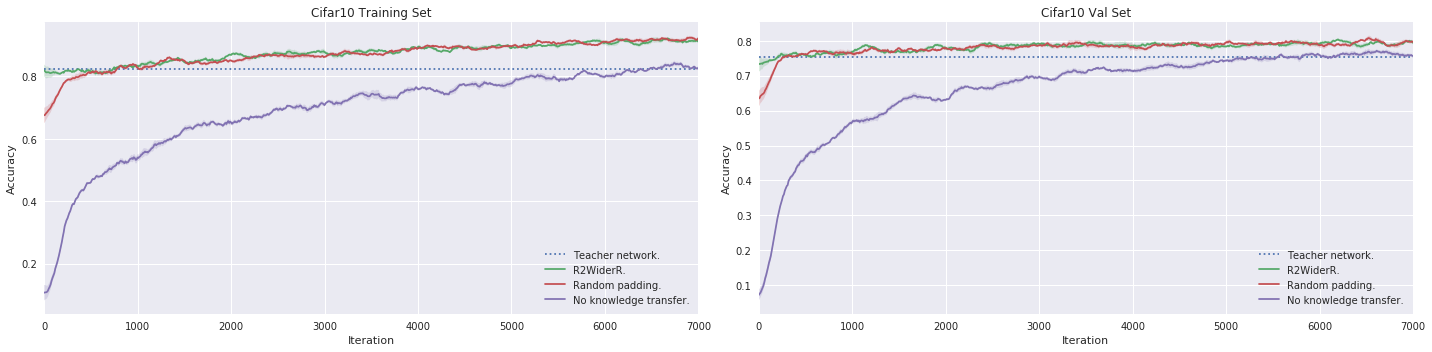

In [27]:
# Plot the results of the above tests with confidence intervals
plt.figure(figsize=(20,5))
plt.tight_layout()

teacher_ema = ema(wid_teacher_results, e=0.95)
our_pad_ema = ema_dl(wid_our_pad_results, e=0.95)
rand_pad_ema = ema_dl(wid_rand_pad_results, e=0.95)
no_trans_ema = ema_dl(wid_no_trans_results, e=0.95)
teacher_ema_val = ema(wid_teacher_results_val, e=0.95)
our_pad_ema_val = ema_dl(wid_our_pad_results_val, e=0.95)
rand_pad_ema_val = ema_dl(wid_rand_pad_results_val, e=0.95)
no_trans_ema_val = ema_dl(wid_no_trans_results_val, e=0.95)

cp = sns.color_palette("deep", 10)

plt.subplot(121)
plt.xlabel('Iteration')
plt.ylabel('Accuracy')
plt.title('Cifar10 Training Set')
# sns.tsplot(data=teacher_ema, time=wid_teacher_time_updates, color=cp[0], condition=wid_teacher_label, linestyle=":")
sns.tsplot(data=[teacher_ema[-1]] * len(wid_our_pad_time_updates), 
           time=wid_our_pad_time_updates, color=cp[0], condition="Teacher network.", linestyle=":")
sns.tsplot(data=our_pad_ema, time=wid_our_pad_time_updates, color=cp[1], condition=wid_our_pad_label)
sns.tsplot(data=rand_pad_ema, time=wid_rand_pad_time_updates, color=cp[2], condition=wid_rand_pad_label)
sns.tsplot(data=no_trans_ema, time=wid_no_trans_time_updates, color=cp[3], condition=wid_no_trans_label)
plt.legend()

plt.subplot(122)
plt.xlabel('Iteration')
plt.ylabel('Accuracy')
plt.title('Cifar10 Val Set')
# sns.tsplot(data=teacher_ema_val, time=wid_teacher_time_updates, color=cp[0], condition=wid_teacher_label, linestyle=":")
sns.tsplot(data=[teacher_ema_val[-1]] * len(wid_our_pad_time_updates), 
           time=wid_our_pad_time_updates, color=cp[0], condition="Teacher network.", linestyle=":")
sns.tsplot(data=our_pad_ema_val, time=wid_our_pad_time_updates, color=cp[1], condition=wid_our_pad_label)
sns.tsplot(data=rand_pad_ema_val, time=wid_rand_pad_time_updates, color=cp[2], condition=wid_rand_pad_label)
sns.tsplot(data=no_trans_ema_val, time=wid_no_trans_time_updates, color=cp[3], condition=wid_no_trans_label)
plt.legend()


plt.tight_layout()

### Copying Net2DeeperNet tests

/anaconda/envs/cs231n/lib/python3.6/site-packages/seaborn/timeseries.py:183: UserWarning: The tsplot function is deprecated and will be removed or replaced (in a substantially altered version) in a future release.
  warnings.warn(msg, UserWarning)


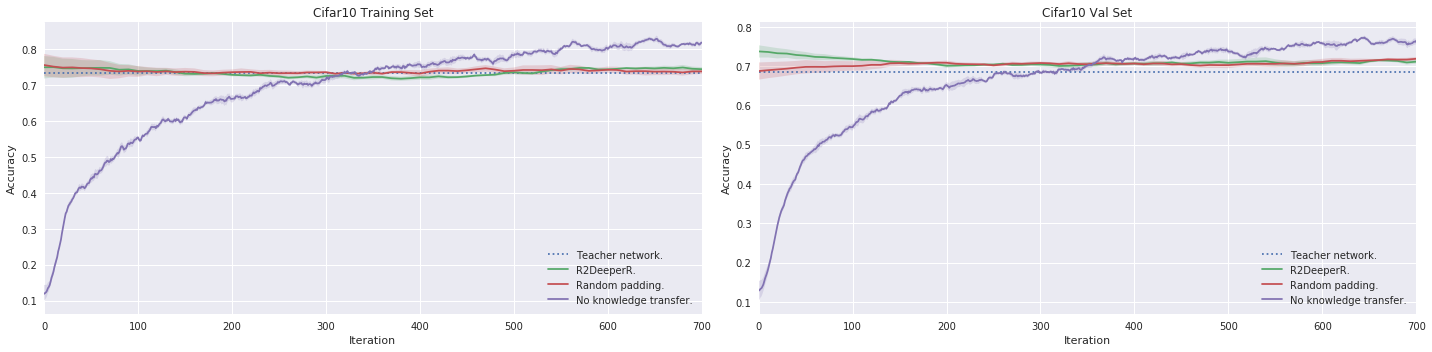

In [168]:
# Plot the results of the above tests with confidence intervals
plt.figure(figsize=(20,5))
plt.tight_layout()

teacher_ema = ema(deep_teacher_results, e=0.95)
our_pad_ema = ema_dl(deep_our_pad_results, e=0.95)
rand_pad_ema = ema_dl(deep_rand_pad_results, e=0.95)
no_trans_ema = ema_dl(deep_no_trans_results, e=0.95)
teacher_ema_val = ema(deep_teacher_results_val, e=0.95)
our_pad_ema_val = ema_dl(deep_our_pad_results_val, e=0.95)
rand_pad_ema_val = ema_dl(deep_rand_pad_results_val, e=0.95)
no_trans_ema_val = ema_dl(deep_no_trans_results_val, e=0.95)

cp = sns.color_palette("deep", 10)

plt.subplot(121)
plt.xlabel('Iteration')
plt.ylabel('Accuracy')
plt.title('Cifar10 Training Set')
sns.tsplot(data=[teacher_ema[-1]] * len(deep_our_pad_time_updates), 
           time=deep_our_pad_time_updates, color=cp[0], condition="Teacher network.", linestyle=":")
sns.tsplot(data=our_pad_ema, time=deep_our_pad_time_updates, color=cp[1], condition=deep_our_pad_label)
sns.tsplot(data=rand_pad_ema, time=deep_rand_pad_time_updates, color=cp[2], condition=deep_rand_pad_label)
sns.tsplot(data=no_trans_ema, time=deep_no_trans_time_updates, color=cp[3], condition=deep_no_trans_label)
# sns.tsplot(data=teacher_ema, time=deep_teacher_time_updates, color=cp[0], condition=deep_teacher_label, linestyle=":")
plt.legend()

plt.subplot(122)
plt.xlabel('Iteration')
plt.ylabel('Accuracy')
plt.title('Cifar10 Val Set')
sns.tsplot(data=[teacher_ema_val[-1]] * len(deep_our_pad_time_updates), 
           time=deep_our_pad_time_updates, color=cp[0], condition="Teacher network.", linestyle=":")
sns.tsplot(data=our_pad_ema_val, time=deep_our_pad_time_updates, color=cp[1], condition=deep_our_pad_label)
sns.tsplot(data=rand_pad_ema_val, time=deep_rand_pad_time_updates, color=cp[2], condition=deep_rand_pad_label)
sns.tsplot(data=no_trans_ema_val, time=deep_no_trans_time_updates, color=cp[3], condition=deep_no_trans_label)
# sns.tsplot(data=teacher_ema_val, time=deep_teacher_time_updates, color=cp[0], condition=deep_teacher_label, linestyle=":")
plt.legend()


plt.tight_layout()

# And a place to display all of the results for neuroevolution tests

## Load the data

In [110]:
import pandas as pd

In [116]:
results = load("baseline_ne_tests")
b_train_acc = results['train_acc']
b_val_acc = results['val_acc']
b_acc_times = results['acc_times']
b_test_acc = results['test_accs']

print(b_test_acc)

[0.107999995, 0.52400005, 0.582, 0.6420001, 0.674, 0.6780001, 0.679, 0.69799995, 0.70199996, 0.69100004, 0.715]


In [149]:
results = load("ne_tests")
ne_train_acc = results['train_acc']
ne_val_acc = results['val_acc']
ne_acc_times = results['acc_times']
ne_evo_times = results['evo_times']
ne_val_profiles = results['val_profiles']
ne_test_profiles = results['test_profiles']
ne_test_accs = results['test_accs']

print(ne_test_accs)

[0.725, 0.723, 0.721]


In [161]:
results = load("coevolve_ne_tests")
cne_train_acc = results['train_acc']
cne_val_acc = results['val_acc']
cne_acc_times = results['acc_times']
cne_evo_times = results['evo_times']
cne_val_profiles = results['val_profiles']
cne_test_profiles = results['test_profiles']
cne_test_accs = results['test_accs']

print(cne_test_accs)

[0.699, 0.70100003, 0.699, 0.704]


### Baseline for NE tests

/anaconda/envs/cs231n/lib/python3.6/site-packages/seaborn/timeseries.py:183: UserWarning: The tsplot function is deprecated and will be removed or replaced (in a substantially altered version) in a future release.
  warnings.warn(msg, UserWarning)


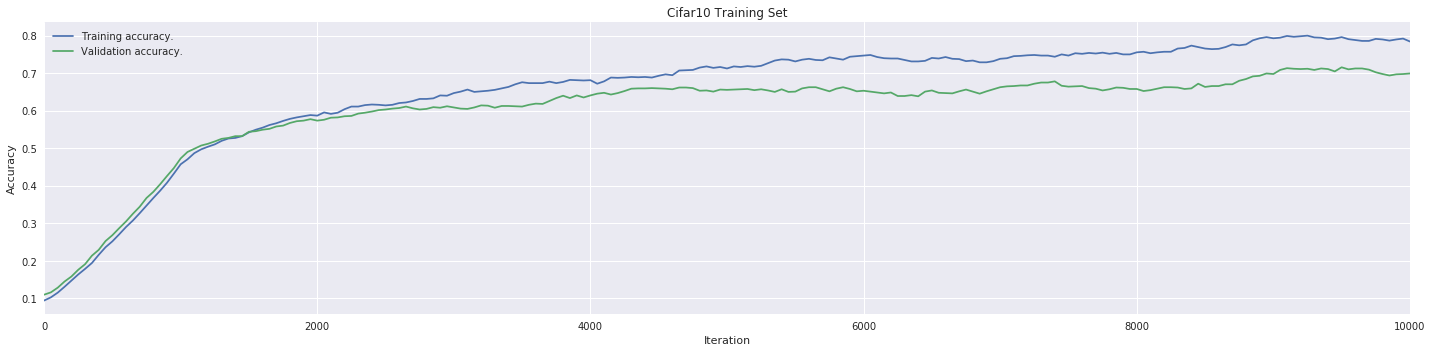

In [113]:
# Plot the results of the above tests with confidence intervals
plt.figure(figsize=(20,5))
plt.tight_layout()

train_ema = ema(b_train_acc, e=0.95)
val_ema = ema(b_val_acc, e=0.95)

cp = sns.color_palette("deep", 10)

plt.xlabel('Iteration')
plt.ylabel('Accuracy')
plt.title('Cifar10 Training Set')
sns.tsplot(data=train_ema, time=b_acc_times, color=cp[0], condition="Training accuracy.")
sns.tsplot(data=val_ema, time=b_acc_times, color=cp[1], condition="Validation accuracy.")
plt.legend()

plt.tight_layout()

## Core NE tests

(-25, 1025)

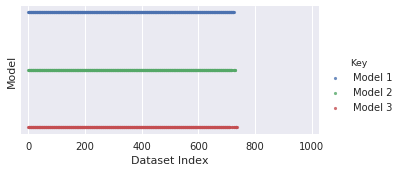

In [154]:
# Tuple'arise the profiles
val_profiles = []
for i in range(len(ne_val_profiles[0])):
    tple = tuple([ne_val_profiles[j][i] for j in range(len(ne_val_profiles))])
    val_profiles.append(tple)
val_profiles.sort()
val_profiles.reverse()


test_profiles = []
for i in range(len(ne_test_profiles[0])):
    tple = tuple([ne_test_profiles[j][i] for j in range(len(ne_test_profiles))])
    test_profiles.append(tple)
test_profiles.sort()
test_profiles.reverse()

# Untuple'arise
sorted_val_profiles = []
for j in range(len(val_profiles[0])):
    profile = [val_profiles[i][j] for i in range(len(val_profiles))]
    sorted_val_profiles.append(profile)
    
sorted_test_profiles = []
for j in range(len(test_profiles[0])):
    profile = [test_profiles[i][j] for i in range(len(test_profiles))]
    sorted_test_profiles.append(profile)
    
    
val_scatters = []
for i in range(len(sorted_val_profiles)):
    scatter = []
    for j in range(len(sorted_val_profiles[i])):
        if sorted_val_profiles[i][j] == 1.0:
            scatter.append((j,i))
    val_scatters.append(scatter)
    
test_scatters = []
for i in range(len(sorted_test_profiles)):
    scatter = []
    y = len(sorted_test_profiles) - i
    for j in range(len(sorted_test_profiles[i])):
        if sorted_test_profiles[i][j] == 1.0:
            scatter.append((float(j),float(y)))
    test_scatters.append(scatter)
    


    
df = pd.DataFrame()
all_xs = []
all_ys = []
all_zs = []
for i in range(len(test_scatters)):
    xs, ys = zip(*test_scatters[i])
    xs, ys = list(xs), list(ys)
    all_xs.extend(xs)
    all_ys.extend(ys)
    all_zs.extend(['Model %d'%(i+1)] * len(ys))

df['Dataset Index'] = all_xs
df['Model'] = all_ys
df['Key'] = all_zs

g = sns.lmplot('Dataset Index', # Horizontal axis
           'Model', # Vertical axis
           data=df, # Data source
           fit_reg=False, # Don't fix a regression line
           hue="Key", # Set color
           scatter_kws={"marker": "D", # Set marker style
                        "s": 10},
              aspect=2,
              size=2.5) # S marker size

# sns.lmplot(x=[xs], y=[ys], fit_reg=False)

plt.yticks([])
g.axes[0,0].set_xlim(-25,1025)

/anaconda/envs/cs231n/lib/python3.6/site-packages/seaborn/timeseries.py:183: UserWarning: The tsplot function is deprecated and will be removed or replaced (in a substantially altered version) in a future release.
  warnings.warn(msg, UserWarning)


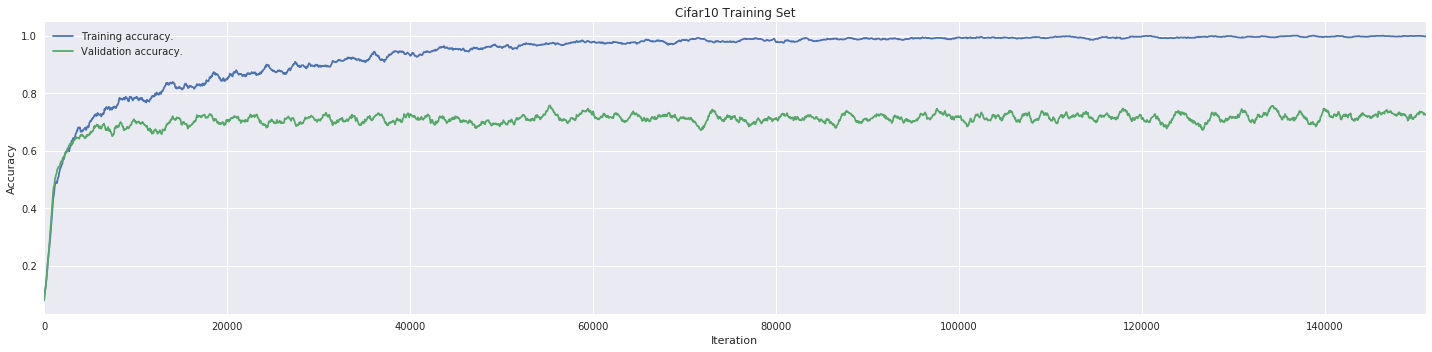

In [155]:
# Plot the results of the above tests with confidence intervals
plt.figure(figsize=(20,5))
plt.tight_layout()

train_ema = ema(ne_train_acc, e=0.95)
val_ema = ema(ne_val_acc, e=0.95)

cp = sns.color_palette("deep", 10)

plt.xlabel('Iteration')
plt.ylabel('Accuracy')
plt.title('Cifar10 Training Set')
sns.tsplot(data=train_ema, time=ne_acc_times, color=cp[0], condition="Training accuracy.")
sns.tsplot(data=val_ema, time=ne_acc_times, color=cp[1], condition="Validation accuracy.")
plt.legend()

plt.tight_layout()

### Coevolution NE tests

(-25, 1025)

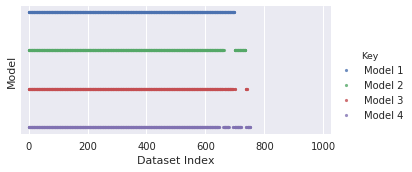

In [162]:
# Tuple'arise the profiles
val_profiles = []
for i in range(len(cne_val_profiles[0])):
    tple = tuple([cne_val_profiles[j][i] for j in range(len(cne_val_profiles))])
    val_profiles.append(tple)
val_profiles.sort()
val_profiles.reverse()


test_profiles = []
for i in range(len(cne_test_profiles[0])):
    tple = tuple([cne_test_profiles[j][i] for j in range(len(cne_test_profiles))])
    test_profiles.append(tple)
test_profiles.sort()
test_profiles.reverse()

# Untuple'arise
sorted_val_profiles = []
for j in range(len(val_profiles[0])):
    profile = [val_profiles[i][j] for i in range(len(val_profiles))]
    sorted_val_profiles.append(profile)
    
sorted_test_profiles = []
for j in range(len(test_profiles[0])):
    profile = [test_profiles[i][j] for i in range(len(test_profiles))]
    sorted_test_profiles.append(profile)
    
    
val_scatters = []
for i in range(len(sorted_val_profiles)):
    scatter = []
    for j in range(len(sorted_val_profiles[i])):
        if sorted_val_profiles[i][j] == 1.0:
            scatter.append((j,i))
    val_scatters.append(scatter)
    
test_scatters = []
for i in range(len(sorted_test_profiles)):
    scatter = []
    y = len(sorted_test_profiles) - i
    for j in range(len(sorted_test_profiles[i])):
        if sorted_test_profiles[i][j] == 1.0:
            scatter.append((float(j),float(y)))
    test_scatters.append(scatter)
    


    
df = pd.DataFrame()
all_xs = []
all_ys = []
all_zs = []
for i in range(len(test_scatters)):
    xs, ys = zip(*test_scatters[i])
    xs, ys = list(xs), list(ys)
    all_xs.extend(xs)
    all_ys.extend(ys)
    all_zs.extend(['Model %d'%(i+1)] * len(ys))

df['Dataset Index'] = all_xs
df['Model'] = all_ys
df['Key'] = all_zs

g = sns.lmplot('Dataset Index', # Horizontal axis
           'Model', # Vertical axis
           data=df, # Data source
           fit_reg=False, # Don't fix a regression line
           hue="Key", # Set color
           scatter_kws={"marker": "D", # Set marker style
                        "s": 10},
              aspect=2,
              size=2.5) # S marker size

# sns.lmplot(x=[xs], y=[ys], fit_reg=False)

plt.yticks([])
g.axes[0,0].set_xlim(-25,1025)

/anaconda/envs/cs231n/lib/python3.6/site-packages/seaborn/timeseries.py:183: UserWarning: The tsplot function is deprecated and will be removed or replaced (in a substantially altered version) in a future release.
  warnings.warn(msg, UserWarning)


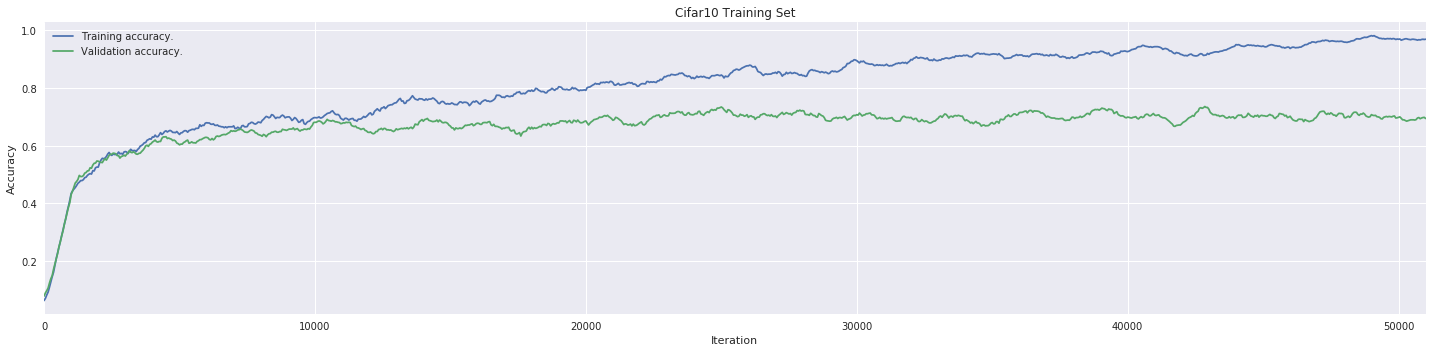

In [163]:
# Plot the results of the above tests with confidence intervals
plt.figure(figsize=(20,5))
plt.tight_layout()

train_ema = ema(cne_train_acc, e=0.95)
val_ema = ema(cne_val_acc, e=0.95)

cp = sns.color_palette("deep", 10)

plt.xlabel('Iteration')
plt.ylabel('Accuracy')
plt.title('Cifar10 Training Set')
sns.tsplot(data=train_ema, time=cne_acc_times, color=cp[0], condition="Training accuracy.")
sns.tsplot(data=val_ema, time=cne_acc_times, color=cp[1], condition="Validation accuracy.")
plt.legend()

plt.tight_layout()